In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ta


# quant

Exploring how ideas from applied mathematics, physics, and signal processing can be applied to predicting market time series. Several methodologies will be compared:
* Time series analysis and differential equations
    - Simplex projection is particularly of interest
* Machine learning: quantitative 
    - LSTM
    - Clustering (which could tie in to a graph based model)
* Machine learning: qualititative 
    - Sentiment Analysis 



How to set up ta:
` $ pip install --upgrade ta `


[Google drive](https://drive.google.com/drive/u/1/folders/12lqrfkH5p5JVHiiYNTpMfTezfoFQCbTE)



# TA Lib implimentation

https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#volatility-indicators

In [8]:
data = yf.download('AAPL','2018-08-01','2019-08-01')


[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,196.668900,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,202.417679,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,203.003281,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,204.057388,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,202.144379,25587400


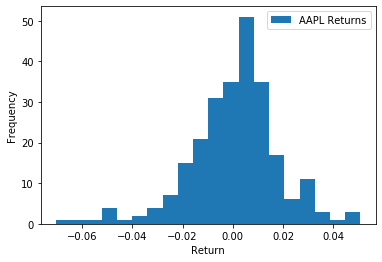

In [6]:
R = data['Open'].pct_change()[1:]
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['AAPL Returns']);

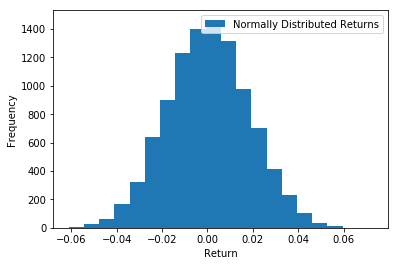

In [12]:
plt.hist(np.random.normal(np.mean(R), np.std(R), 10000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);

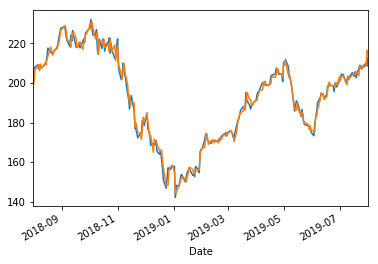

In [6]:

data.Close.plot()
data.Open.plot()

In [16]:
aapl = yf.Ticker("aapl")

In [7]:
#aapl.actions #shows dividends and stock splits

# Sample plot of 2 mavgs with stoch oscillator below.  

In [9]:
aapl_sma20 = ta.volatility.bollinger_mavg(data['Close'], 20)
aapl_sma50 = ta.volatility.bollinger_mavg(data['Close'], 50)
aapl_stoch = ta.momentum.stoch(data['High'], data['Low'], data['Close'], n=14)

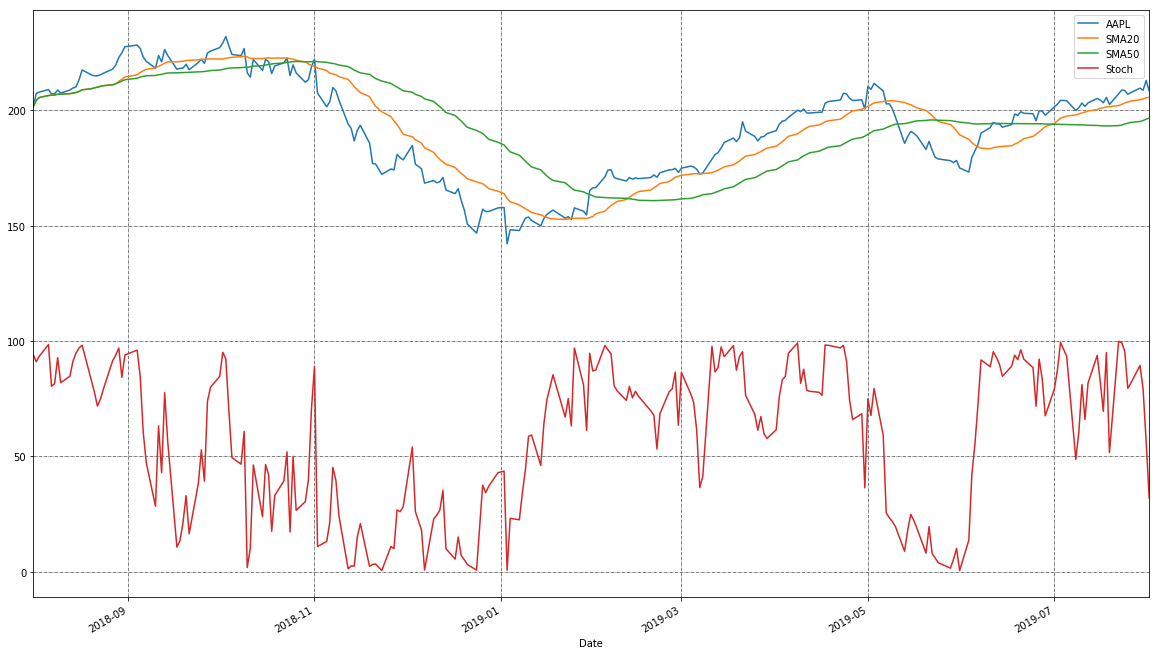

In [23]:

pd.DataFrame({   
    'AAPL': data['Close'],
    'SMA20': aapl_sma20,
    'SMA50': aapl_sma50,
    'Stoch': aapl_stoch
}).plot(figsize = (20,12))

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)



In [26]:
data.shape

(252, 6)

# Momentum Indicators

### Awesome Oscillator

Awesome Oscillator Strategy includes 3 ways of trading.

1.) Open a sell position when the Awesome oscillator is below the zero line forming a peak, and open a buy position when the oscillator is above the zero line forming a gap.

2.)Open a sell position when the Awesome oscillator forms two peaks above the zero line, where the second high is lower than the previous one. And, conversely, traders watch to open a buy position when the oscillator forms to lows below the zero line with the last one not as low as the previous one.

3.)Account crossing the zero line. When the Awesome oscillator crosses it from up to down, it is time to open a sell position and when it crosses from down to up, it is time to open a buy position.

In [28]:
aapl_ao = ta.momentum.ao(data['High'], data['Low'], s=5, len=4)

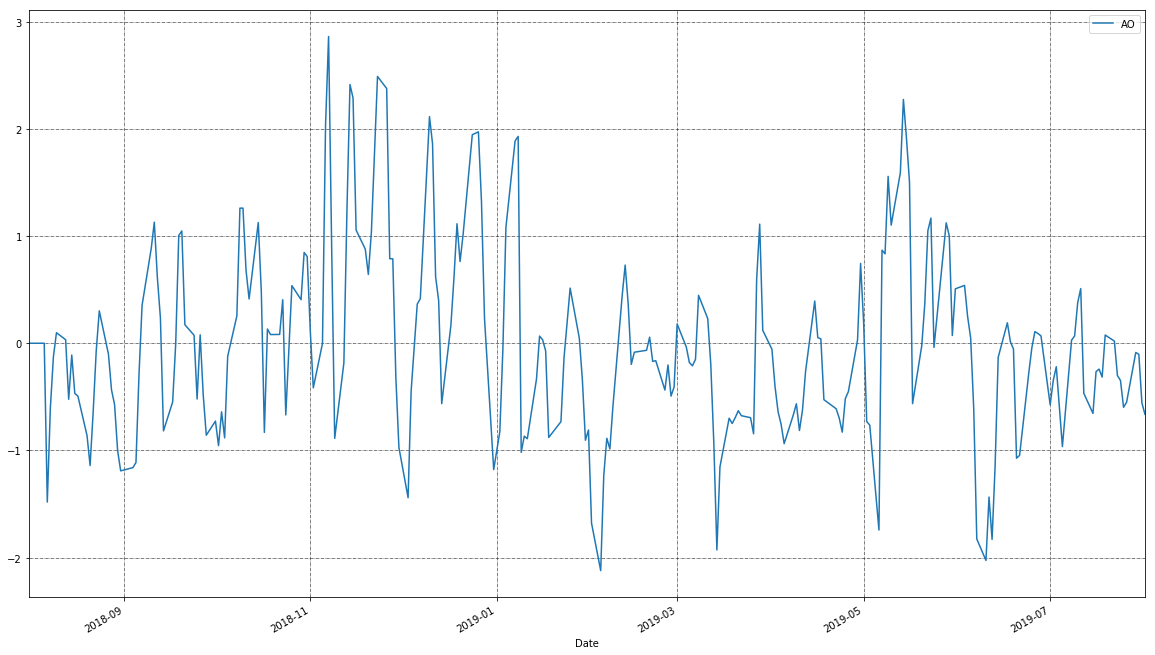

In [30]:

pd.DataFrame({  
    'AO': aapl_ao,
}).plot(figsize = (20,12))

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)



### Kaufman’s Adaptive Moving Average (KAMA)

In [ ]:
aapl_kama = ta.momentum.kama(data['Close'], n=10, pow1=2, pow2=30, fillna=False)

### Moneyflow

In [ ]:
aapl_mf = ta.momentum.money_flow_index(data['High'], data['Low'],data['Close'], data['volume'], n=14, fillna=False)

### RSI

In [37]:
aapl_rsi = ta.momentum.rsi(data['Close'], n=14, fillna=False)

NameError: name 'Data' is not defined

### Stoch included at start of notebook

### Stoch Signal 
3 day sma of stoch

In [38]:
aapl_stochsig = ta.momentum.stoch_signal(data['High'], data['Low'], data['Close'], n=14, d_n=3, fillna=False)

### TSI

In [ ]:
aapl_tsi = ta.momentum.tsi(data['Close'], r=25, s=13, fillna=False)

### Ultimate Oscillator

In [ ]:
aapl_uo = ta.momentum.uo(data['High'], data['Low'], data['Close'], s=7, m=14, len=28, ws=4.0, wm=2.0, wl=1.0, fillna=False)

### William's %R

In [ ]:
aapl_wr = ta.momentum.wr(data['High'], data['Low'], data['Close'], lbp=14, fillna=False)

# Volatility

### ATR

In [ ]:
aapl_atr = ta.volatility.average_true_range(data['High'], data['Low'], data['Close'], n=14, fillna=False)

## (Band indicators return 1 if close is higher/lower than band) ---> BB and DC

### High Bollinger Bands

In [ ]:
aapl_bbh = ta.volatility.bollinger_hband(data['Close'], n=20, ndev=2, fillna=False)

### BB High Band Indicator

In [ ]:
aapl_bbhi = ta.volatility.bollinger_hband_indicator(data['Close'], n=20, ndev=2, fillna=False)

### Low BB

In [ ]:
aapl_bbl = ta.volatility.bollinger_lband(data['Close'], n=20, ndev=2, fillna=False)

### Low band indicator

In [ ]:
aapl_bbli = ta.volatility.bollinger_lband_indicator(data['Close'], n=20, ndev=2, fillna=False)

### MA also up top

### Donchian Channel High Band

In [ ]:
aapl_dch = ta.volatility.donchian_channel_hband(data['Close'], n=20, fillna=False)


### DC HB ind

In [40]:
aapl_dchi = ta.volatility.donchian_channel_hband_indicator(data['Close'], n=20, fillna=False) 

### DC Low band

In [ ]:
aapl_dcl = ta.volatility.donchian_channel_lband(data['Close'], n=20, fillna=False)

### its indicator

In [ ]:
aapl_dcli =ta.volatility.donchian_channel_lband_indicator(data['Close'], n=20, fillna=False)

### Keltner CHannel (Central) seems to me just an sma

In [ ]:
aapl_kc = ta.volatility.keltner_channel_central(data['High'], data['Low'], data['Close'], n=10, fillna=False)

### KC High

In [ ]:
aapl_kch = ta.volatility.keltner_channel_hband(data['High'], data['Low'], data['Close'], n=10, fillna=False)

### KCH indicator

In [ ]:
aapl_kchi = ta.volatility.keltner_channel_hband_indicator(data['High'], data['Low'], data['Close'], n=10, fillna=False)

### KCL 

In [ ]:
aapl_kcl = ta.volatility.keltner_channel_lband(data['High'], data['Low'], data['Close'], n=10, fillna=False)

### KCL i

In [ ]:
aapl_kcli = ta.volatility.keltner_channel_lband_indicator(data['High'], data['Low'], data['Close'], n=10, fillna=False)